<a href="https://colab.research.google.com/github/Jenny000327/Data_analysis/blob/main/Naver%ED%86%B5%ED%95%A9%EA%B2%80%EC%83%89_%ED%8A%B8%EB%A0%8C%EB%93%9C%EC%A1%B0%ED%9A%8CAPI_%EC%84%A4%EB%AA%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 네이버 통합 검색어 트렌드 조회 API를 사용해서 데이터 요청하고 결과 받아오는 코드.

In [1]:
# 1. 필요한 모듈 import
import os
import sys
import urllib.request


In [2]:
# 2. 클라이언트 아이디와 시크릿을 설정. 
client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"


In [3]:
# 3. API 요청 URL을 설정
url = "https://openapi.naver.com/v1/datalab/search";


In [5]:
# 4. API에 전달할 파라미터를 JSON 형식의 문자열로 직상힌다. 
# 이 예제에서는 2017년 1월 1일 부터 4월 30일 까지, 한글 영어 검색어 추이, 월간 기준, PC에서 조회, 여자, 10대20대 
body = "{\"startDate\":\"2017-01-01\",\
        \"endDate\":\"2017-04-30\",\"timeUnit\":\"month\",\
        \"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},\
        {\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\
        \"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}";


In [6]:
#5. 요청을 위한 객체를 만들고, 헤더에 클라이언트 아이디와 시크릿, 그리고 콘텐츠 타입을 설정
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")


In [7]:
#6. 요청을 보내고 응답을 받는다. 요청 시, JSON 형식의 문자열을 utf-8 인코딩하여 데이터로 전달.
response = urllib.request.urlopen(request, data=body.encode("utf-8"))


In [8]:
#응답의 상태 코드를 확인하고, 성공적으로 데이터를 받아온 경우(200 상태 코드) 결과를 출력. 그렇지 않은 경우, 에러 코드를 출력.
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)



{"startDate":"2017-01-01","endDate":"2017-04-30","timeUnit":"month","results":[{"title":"한글","keywords":["한글","korean"],"data":[{"period":"2017-01-01","ratio":47.00101},{"period":"2017-02-01","ratio":53.23619},{"period":"2017-03-01","ratio":100},{"period":"2017-04-01","ratio":85.327}]},{"title":"영어","keywords":["영어","english"],"data":[{"period":"2017-01-01","ratio":40.0881},{"period":"2017-02-01","ratio":36.69942},{"period":"2017-03-01","ratio":52.11792},{"period":"2017-04-01","ratio":44.4595}]}]}


### 위 코드를 판다스를 사용해서 출력 결과를 DataFrame으로 정리

먼저 pandas와 json 모듈을 import.
그리고 출력된 JSON 결과를 파싱해서 DataFrame에 저장

In [9]:
import os
import sys
import urllib.request
import pandas as pd
import json

client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2017-01-01\",\"endDate\":\"2017-04-30\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    result = json.loads(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

# Create an empty DataFrame
data_df = pd.DataFrame(columns=["title", "period", "ratio"])

# Loop through the results and append each data point to the DataFrame
for keyword_result in result["results"]:
    title = keyword_result["title"]
    for data in keyword_result["data"]:
        period = data["period"]
        ratio = data["ratio"]
        data_df = data_df.append({"title": title, "period": period, "ratio": ratio}, ignore_index=True)

# Print the DataFrame
print(data_df)


  title      period      ratio
0    한글  2017-01-01   47.00101
1    한글  2017-02-01   53.23619
2    한글  2017-03-01  100.00000
3    한글  2017-04-01   85.32700
4    영어  2017-01-01   40.08810
5    영어  2017-02-01   36.69942
6    영어  2017-03-01   52.11792
7    영어  2017-04-01   44.45950


<ipython-input-9-95a19f83aa4a>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append({"title": title, "period": period, "ratio": ratio}, ignore_index=True)
<ipython-input-9-95a19f83aa4a>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append({"title": title, "period": period, "ratio": ratio}, ignore_index=True)
<ipython-input-9-95a19f83aa4a>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append({"title": title, "period": period, "ratio": ratio}, ignore_index=True)
<ipython-input-9-95a19f83aa4a>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append({"title

### 위의 결과를 'maplotlib'과 'seaborn'라이브러리 이용해서 선 그래프로 시각화하기

In [10]:
pip install matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-13-bbc0460bd1a8>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append({"title": title, "period": period, "ratio": ratio}, ignore_index=True)
<ipython-input-13-bbc0460bd1a8>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append({"title": title, "period": period, "ratio": ratio}, ignore_index=True)
<ipython-input-13-bbc0460bd1a8>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append({"title": title, "period": period, "ratio": ratio}, ignore_index=True)
<ipython-input-13-bbc0460bd1a8>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append({"t

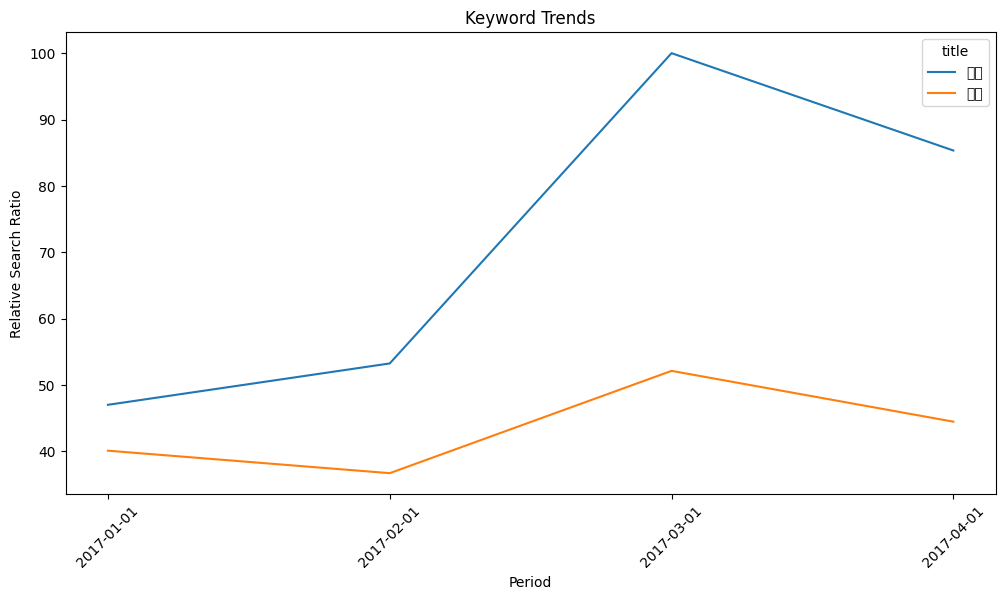

In [13]:
import os
import sys
import urllib.request
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2017-01-01\",\"endDate\":\"2017-04-30\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    result = json.loads(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

data_df = pd.DataFrame(columns=["title", "period", "ratio"])

for keyword_result in result["results"]:
    title = keyword_result["title"]
    for data in keyword_result["data"]:
        period = data["period"]
        ratio = data["ratio"]
        data_df = data_df.append({"title": title, "period": period, "ratio": ratio}, ignore_index=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x='period', y='ratio', hue='title', data=data_df)
plt.title("Keyword Trends")
plt.xlabel("Period")
plt.ylabel("Relative Search Ratio")
plt.xticks(rotation=45)
plt.show()
